## 딥러닝

### 심층신경망

In [7]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전 장에서 다우로드 했기 때문에 다시 다운로드 하지 않음

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [8]:
# 스케일링
sclaer = StandardScaler()
train_scaled = sclaer.fit_transform(train_input.astype(np.float64))
test_sclaed = sclaer.transform(test_input.astype(np.float64))

In [9]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [11]:
print(train_scaled.shape, val_scaled.shape, test_sclaed.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


#### 심층신경망 만들기1

In [ ]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [13]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [ ]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [32]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accurary')

In [35]:
# 훈련
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1496/1500 [============================>.] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
model.evaluate(val_scaled, val_target)
# 검증 정확도: 87.8%

TypeError: in user code:

    File "c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py", line 1920, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [37]:
pred_result = model.predict(test_sclaed)

313/313 [==============================] - 0s 913us/step


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [51]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [59]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    # plt.title(f'실제: {true_label}, 예측: {pred_label}')
    # plt.title('예측', fontsize=13)
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {true_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

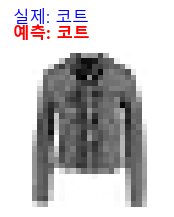

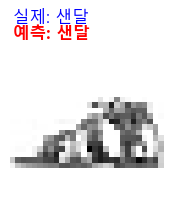

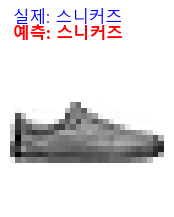

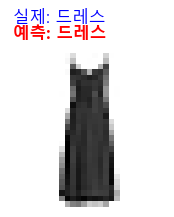

In [61]:
for i  in range(10, 14):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층에 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워 있어서 올바른 출력을 못 만듦

- 렐루함수(ReLU) : 수정된 선형유닛이라는 뜻의 함수

    <img src="../image/ml0011.png" width="500">

#### Flatten 객체
- 이미지 2차원 배열을 1차원으로 변경할 때 np.reshape() 사용
- Flatten 클래스가 위에 일을 대신해줌

In [63]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [64]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [68]:
train_scaled = train_input / 255.0
test_sclaed = test_input / 255.0

In [69]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [70]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [71]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5297 - accuracy: 0.8134
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3902 - accuracy: 0.8591
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3526 - accuracy: 0.8742
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3300 - accuracy: 0.8822
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3143 - accuracy: 0.8867
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3031 - accuracy: 0.8923
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2910 - accuracy: 0.8947
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2846 - accuracy: 0.8990
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2763 - accuracy: 0.9022
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.269

In [ ]:
model2.evaluate(val_scaled, val_target)
# ReLU함수 사용시, Sigmoid 함수 사용시 보다 0.01% 개선

375/375 [==============================] - 0s 888us/step - loss: 0.4215 - accuracy: 0.8875


[0.4215044379234314, 0.887499988079071]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [74]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [ ]:
# 모델3 설정, 최적화는 adam 클래스만 사용할 것!
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
# 모델3 훈련. 모델훈련은 정보를 저장하기 때문에 반복할 수록 정확도 상승!
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1822 - accuracy: 0.9327
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1761 - accuracy: 0.9348
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1719 - accuracy: 0.9356
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1696 - accuracy: 0.9357
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1646 - accuracy: 0.9392
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1624 - accuracy: 0.9387
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1559 - accuracy: 0.9416
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1536 - accuracy: 0.9428
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1505 - accuracy: 0.9433
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.146

- optimizer 사용시 0.01정도 개선

In [ ]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88% - 7정도 차이이

375/375 [==============================] - 0s 913us/step - loss: 0.3363 - accuracy: 0.8899


[0.33632707595825195, 0.8899166584014893]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림.

In [80]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [83]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# 모델4 설정, 최적화는 adam 클래스만 사용할 것!
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [85]:
# 모델3 훈련. 모델훈련은 정보를 저장하기 때문에 반복할 수록 정확도 상승!
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5845 - accuracy: 0.7956
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4376 - accuracy: 0.8429
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4037 - accuracy: 0.8538
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3839 - accuracy: 0.8596
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3653 - accuracy: 0.8666
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3524 - accuracy: 0.8708
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3433 - accuracy: 0.8744
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3327 - accuracy: 0.8765
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3253 - accuracy: 0.8800
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.318

In [86]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% - 1차이(훈련과 검증 사이에 차이가 거의 없음)

375/375 [==============================] - 0s 910us/step - loss: 0.3258 - accuracy: 0.8858


[0.32580024003982544, 0.8858333230018616]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트) 사이에 정확도 창이가 줄어듬
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터만 저장하는 두가지 방법이 존재

In [87]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [88]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면 먼저 모델을 생성해야 함

In [89]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten5'),
    keras.layers.Dense(100, activation='relu', name='hidden5'),
    keras.layers.Dropout(0.3, name='dropout5'), 
    keras.layers.Dense(10, activation='softmax', name='output5')
], name='Fashion_MNIST_RELU5')

In [90]:
model5.load_weights('./model4-weight.h5')

In [95]:
pred_result = model5.predict(test_sclaed)

313/313 [==============================] - 0s 850us/step


In [97]:
model5.summary()

Model: "Fashion_MNIST_RELU5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten5 (Flatten)          (None, 784)               0         
                                                                 
 hidden5 (Dense)             (None, 100)               78500     
                                                                 
 dropout5 (Dropout)          (None, 100)               0         
                                                                 
 output5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델까지 전부 생성해주는 방법

In [99]:
model6 = keras.models.load_model('./model4-whole.h5')

In [104]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model6.evaluate(test_scaled, test_target)

375/375 [==============================] - 0s 908us/step - loss: 0.3258 - accuracy: 0.8858


[0.32580024003982544, 0.8858333230018616]

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료를` 위해 사용.

In [107]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU7')

In [108]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [109]:
# 에포크마다 모델 저장기능 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True)     # 최고 상태면 저장
# 조기종료 콜백
# 두번 이상 훈련값이 동일하면 조기종료, 이전 최고상태로 복구
early_stopp_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)   

In [ ]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopp_cb]
)


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5962 - accuracy: 0.7904 - val_loss: 0.4188 - val_accuracy: 0.8519
Epoch 2/20
 127/1500 [=>............................] - ETA: 1s - loss: 0.4364 - accuracy: 0.8445

c:\source\iot-dataanlysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4423 - accuracy: 0.8417 - val_loss: 0.3856 - val_accuracy: 0.8574
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4015 - accuracy: 0.8536 - val_loss: 0.3638 - val_accuracy: 0.8683
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3805 - accuracy: 0.8615 - val_loss: 0.3593 - val_accuracy: 0.8655
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3678 - accuracy: 0.8651 - val_loss: 0.3471 - val_accuracy: 0.8695
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3538 - accuracy: 0.8694 - val_loss: 0.3460 - val_accuracy: 0.8742
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3457 - accuracy: 0.8740 - val_loss: 0.3406 - val_accuracy: 0.8768
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3322 - accuracy: 0.8772 - val_loss: 0.3273 - val_accuracy: 0.8806
Epo

In [112]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 874us/step - loss: 0.3273 - accuracy: 0.8806


[0.3272780478000641, 0.8805833458900452]

In [113]:
model7.evaluate(test_sclaed, test_target)

313/313 [==============================] - 0s 886us/step - loss: 0.3522 - accuracy: 0.8735


[0.3522285223007202, 0.8734999895095825]

In [114]:
early_stopp_cb.stopped_epoch

9

- 20번 중 15번 반복에서 조기 종료

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층(심층) 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보안한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`, SGD(확률적 경사하강법), RMSprop...

- `드랍아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것 -> 과대적합을 막기위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서
- `콜백` : 에포크마다 모델 저장 또는 조기종료를 위해서 다른 기능을 수행하는 것